#**AI in Industry**

**Author**: Jyoti Yadav

**Date**: July 2022

**Email**: jyoti.yadav@studio.unibo.it

##Preliminary Steps

In [ ]:
!pip install torch
!pip install missingno
!pip install dfencoder
!pip install pytorch-tabnet
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Important libraries for the model building

import sys 
import gzip
import os, shutil 
import pandas as pd
import numpy as np
import torch
# import EncoderDataFrame 
import seaborn as sns
from pathlib import Path
from urllib import request
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
import missingno as msno
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import roc_auc_score
from sklearn.svm import OneClassSVM
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import roc_auc_score
from keras.callbacks import EarlyStopping
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetClassifier
from keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Input, Dense,Dropout
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.covariance import EllipticEnvelope
from dfencoder import EncoderDataFrame
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc,roc_auc_score
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation


from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

LABELS = ["Normal","Anomly"]

# For the reproducibility of the results
random_state=2022

it is necessary, to clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

In [ ]:
# folder = os.getcwd()

# print("Current work directory: " + str(folder))
# dataset_folder = os.path.join(os.getcwd(), "Datasets")
# if not os.path.exists(dataset_folder):
#     os.makedirs(dataset_folder)
# for filename in os.listdir(dataset_folder):
#     file_path = os.path.join(dataset_folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))
# print("Cleaned")

##Dataset Download

In [ ]:
# # Config
# print("Current work directory: {}".format(os.getcwd()))
# dataset_folder = os.path.join(os.getcwd(), "Datasets")

# if not os.path.exists(dataset_folder):
#     os.makedirs(dataset_folder)

# url = "https://github.com/jyotiyadav94/Ai-in-industry/raw/main/new_data/r205n13.gzip"


# dataset_path = os.path.join(dataset_folder, "r205n12.gzip")

# print(dataset_path)

# def download_dataset(download_path: str, url: str):
#     if not os.path.exists(download_path):
#         print("Downloading dataset...")
#         request.urlretrieve(url, download_path)
#         print("Download complete!")


# def extract_dataset(download_path: str, extract_path: str):
#     data = pd.read_parquet(dataset_path)
#     print("Extraction completed!")
#     return data

# # Download
# download_dataset(dataset_path, url)

# #Extraction
# df=extract_dataset(dataset_path, dataset_folder)

##Working with multiple files (r3 files)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#In order to work with some of the files of the dataset please load the dataset to your directory and 
#I worked with r205n12.gzip,r205n13.gzip,r205n14.gzip

data_dir = Path('/content/drive/MyDrive/data')
full_df = pd.concat(pd.read_parquet(parquet_file)for parquet_file in data_dir.glob('*.gzip'))
# full_df.to_csv('dataset.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [ ]:
full_df

,New_label,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
index,,,,,,,,,,,,,,,,,,,,,
24,0,25.575000,1.588527e+09,40709.020,7824.460,99.8,100.0,0,128,3800,...,0.500000,2.410714,0.000000,12.500000,1.071429,0.571429,0.000000,0.0,0.0,0.000000
27,0,25.560000,1.588527e+09,43783.890,8354.040,99.8,100.0,0,128,3800,...,3.923810,2.400000,0.000000,0.000000,3.695238,3.123810,0.000000,0.0,0.0,0.000000
30,0,25.600000,1.588527e+09,42676.510,8632.320,99.8,100.0,0,128,3800,...,0.000000,3.114286,0.000000,6.666667,0.000000,2.238095,0.000000,0.0,0.0,0.000000
33,0,25.600000,1.588527e+09,39837.270,5743.420,99.8,100.0,0,128,3800,...,0.000000,2.554945,0.000000,21.978022,0.000000,2.681319,0.000000,0.0,0.0,0.000000
36,0,25.571429,1.588527e+09,40825.535,7171.825,99.8,100.0,0,128,3800,...,0.000000,4.247253,0.000000,7.142857,0.000000,1.824176,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,0,25.400000,1.615891e+09,11174.000,10293.460,99.9,100.0,0,128,3800,...,0.952381,0.209524,0.010667,20.952381,0.000000,0.314286,0.004952,0.0,0.0,0.000000
96183,0,25.413333,1.615891e+09,11201.220,10410.890,99.9,100.0,0,128,3800,...,0.266667,0.266667,0.002571,12.380952,0.000000,0.000000,0.000000,0.0,0.0,26.666667
96186,0,25.400000,1.615891e+09,11407.840,10224.000,99.9,100.0,0,128,3800,...,0.000000,0.257143,0.001714,42.857143,0.000000,0.171429,0.000000,0.0,0.0,49.523810


In [ ]:
full_df.columns

Index(['New_label', 'avg:ambient', 'avg:boottime', 'avg:bytes_in',
       'avg:bytes_out', 'avg:cpu_aidle', 'avg:cpu_idle', 'avg:cpu_nice',
       'avg:cpu_num', 'avg:cpu_speed',
       ...
       'var:ps0_input_voltag', 'var:ps0_output_curre', 'var:ps0_output_volta',
       'var:ps1_input_power', 'var:ps1_input_voltag', 'var:ps1_output_curre',
       'var:ps1_output_volta', 'var:swap_free', 'var:swap_total',
       'var:total_power'],
      dtype='object', length=503)

## Data Analysis

In [ ]:
full_df.isnull().values.any()

True

In [ ]:
full_df.isnull().sum()

New_label               0
avg:ambient             0
avg:boottime            0
avg:bytes_in            0
avg:bytes_out           0
                       ..
var:ps1_output_curre    0
var:ps1_output_volta    0
var:swap_free           0
var:swap_total          0
var:total_power         0
Length: 503, dtype: int64

<Figure size 864x864 with 0 Axes>

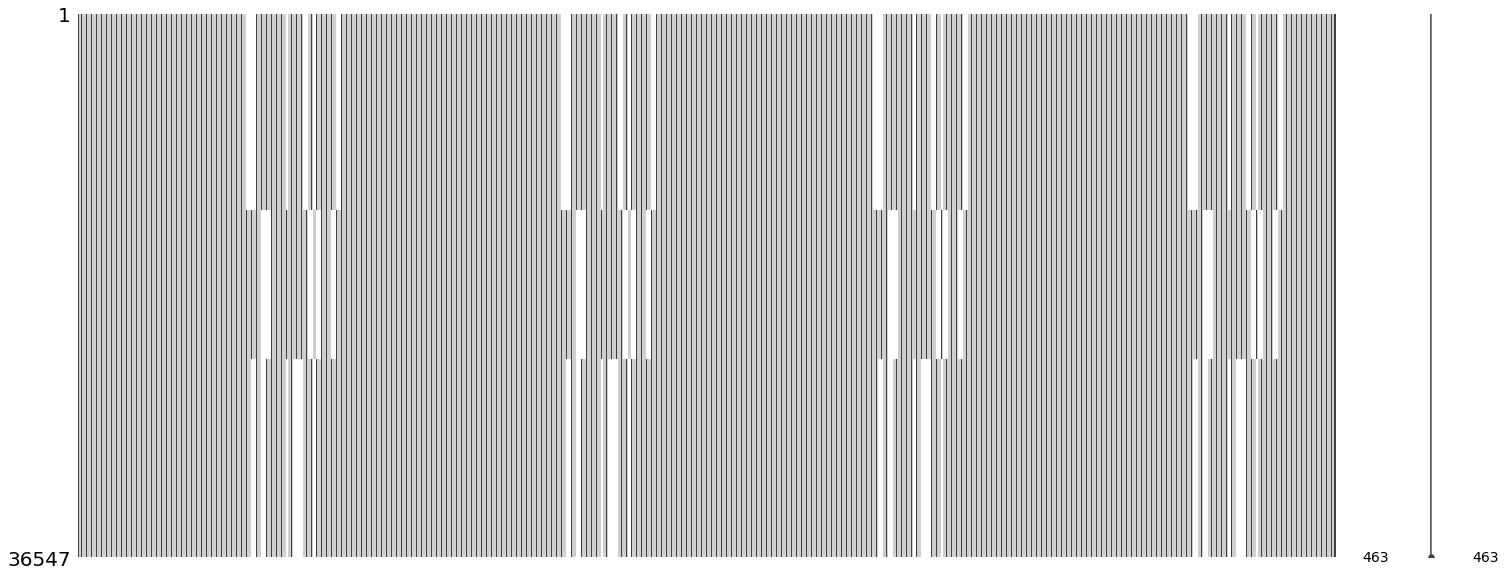

In [ ]:
plt.figure(figsize=(12,12))
msno.matrix(full_df)

<Figure size 864x864 with 0 Axes>

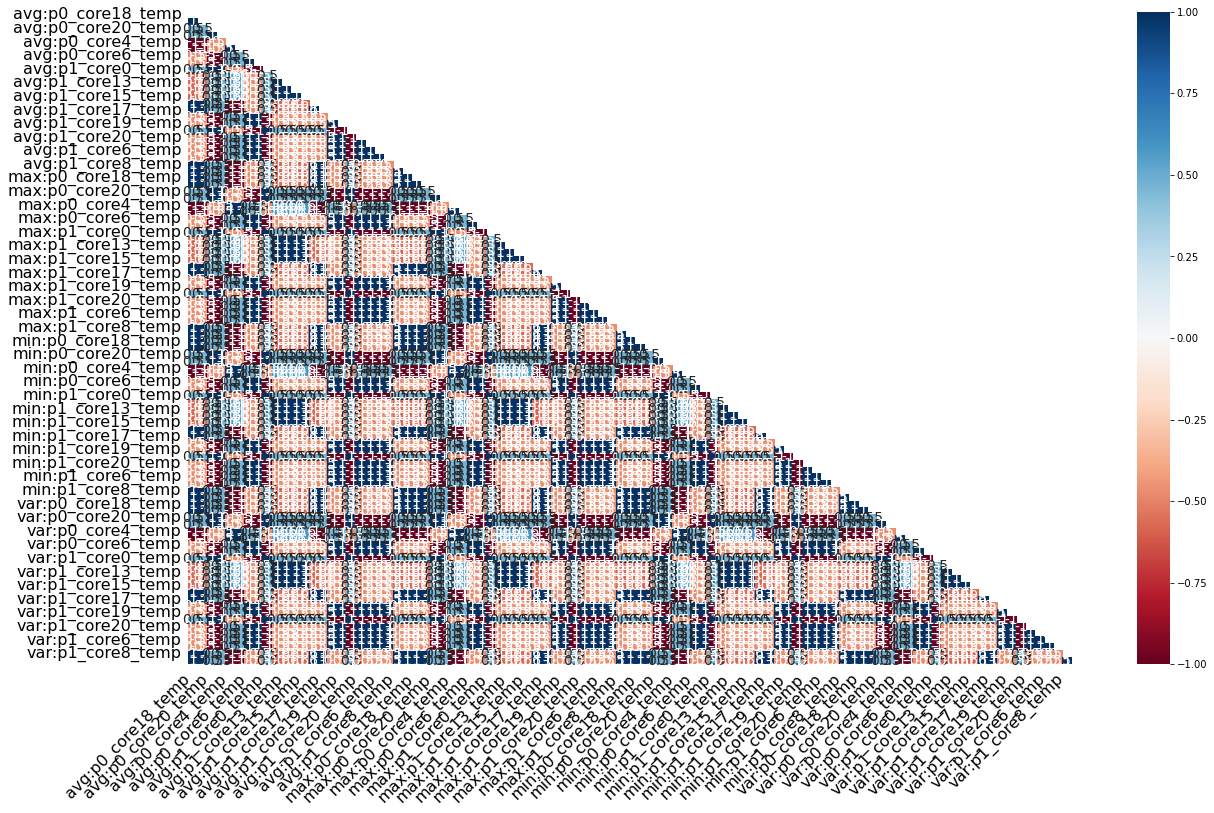

In [ ]:
plt.figure(figsize=(12,12))
msno.heatmap(full_df)

In [ ]:
#finding the total missing values

missing_values = full_df.isnull().sum()
missing_per = (missing_values/full_df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
New_label,0,0.0
avg:ambient,0,0.0
avg:boottime,0,0.0
avg:bytes_in,0,0.0
avg:bytes_out,0,0.0
...,...,...
var:ps1_output_curre,0,0.0
var:ps1_output_volta,0,0.0
var:swap_free,0,0.0
var:swap_total,0,0.0


In [ ]:
full_df

,New_label,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
index,,,,,,,,,,,,,,,,,,,,,
24,0,25.575000,1.588527e+09,40709.020,7824.460,99.8,100.0,0,128,3800,...,0.500000,2.410714,0.000000,12.500000,1.071429,0.571429,0.000000,0.0,0.0,0.000000
27,0,25.560000,1.588527e+09,43783.890,8354.040,99.8,100.0,0,128,3800,...,3.923810,2.400000,0.000000,0.000000,3.695238,3.123810,0.000000,0.0,0.0,0.000000
30,0,25.600000,1.588527e+09,42676.510,8632.320,99.8,100.0,0,128,3800,...,0.000000,3.114286,0.000000,6.666667,0.000000,2.238095,0.000000,0.0,0.0,0.000000
33,0,25.600000,1.588527e+09,39837.270,5743.420,99.8,100.0,0,128,3800,...,0.000000,2.554945,0.000000,21.978022,0.000000,2.681319,0.000000,0.0,0.0,0.000000
36,0,25.571429,1.588527e+09,40825.535,7171.825,99.8,100.0,0,128,3800,...,0.000000,4.247253,0.000000,7.142857,0.000000,1.824176,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,0,25.400000,1.615891e+09,11174.000,10293.460,99.9,100.0,0,128,3800,...,0.952381,0.209524,0.010667,20.952381,0.000000,0.314286,0.004952,0.0,0.0,0.000000
96183,0,25.413333,1.615891e+09,11201.220,10410.890,99.9,100.0,0,128,3800,...,0.266667,0.266667,0.002571,12.380952,0.000000,0.000000,0.000000,0.0,0.0,26.666667
96186,0,25.400000,1.615891e+09,11407.840,10224.000,99.9,100.0,0,128,3800,...,0.000000,0.257143,0.001714,42.857143,0.000000,0.171429,0.000000,0.0,0.0,49.523810


In [ ]:
data=full_df

In [ ]:
# drop the columns which contain at least one NaN value

data = full_df.dropna(axis='columns')

In [ ]:
#finding the total missing values in the column

missing_values = data.isnull().sum()
missing_per = (missing_values/data.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
New_label,0,0.0
avg:ambient,0,0.0
avg:boottime,0,0.0
avg:bytes_in,0,0.0
avg:bytes_out,0,0.0
...,...,...
var:ps1_output_curre,0,0.0
var:ps1_output_volta,0,0.0
var:swap_free,0,0.0
var:swap_total,0,0.0


In [ ]:
df=data
print(df.shape)

#check the total missing rows
print(df.isnull().any(axis=1).sum())

#drop the rows which contain at least NaN values
df.dropna( axis=0,  how='any',inplace=True)

#check if any NaNs after removing
print(df.isnull().values.any())
df.shape

(36547, 407)
0
False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(36547, 407)

In [ ]:
#finding the unique number of labels in the dataset

print("No. of unique labels ", len(df['New_label'].unique()))
print("Label values ",df.New_label.unique())

No. of unique labels  2
Label values  [0 2]


In [ ]:
#finding the count & percentage for each label 

data = df['New_label'].value_counts().to_frame().reset_index()
data['percent'] = data["New_label"].apply(lambda x : round(100*float(x) / len(df), 2))
data = data.rename(columns = {"index" : "Target", "New_label" : "Count"})
data

,Target,Count,percent
0,0,35231,96.4
1,2,1316,3.6


## Imabalanced dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


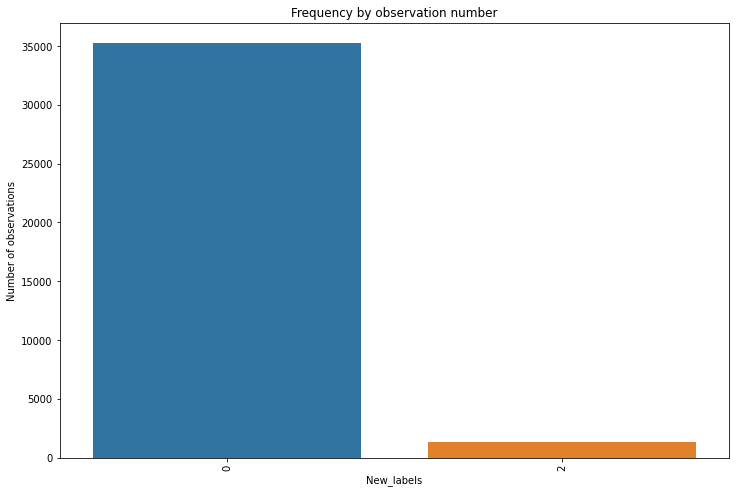

In [ ]:
#visualizing both the New_label classes

countSet = df['New_label'].value_counts()
countSet

plt.figure(figsize=(12,8))
sns.barplot(countSet.index,countSet.values,)
plt.ylabel('Number of observations')
plt.xlabel('New_labels')
plt.title('Frequency by observation number')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
Normal = df[df['New_label']==0]
Anomly = df[df['New_label']==2]
outlier_fraction = len(Anomly)/float(len(Normal))
print(outlier_fraction)

0.03735346711702762


In [ ]:
#drop the label and timestamp as they are not required

df.drop('label', axis=1, inplace=True)
df.drop('timestamp', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1=df

In [ ]:
df2=df

In [ ]:
df1

,New_label,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
index,,,,,,,,,,,,,,,,,,,,,
24,0,25.575000,1.588527e+09,40709.020,7824.460,99.8,100.0,0,128,3800,...,0.500000,2.410714,0.000000,12.500000,1.071429,0.571429,0.000000,0.0,0.0,0.000000
27,0,25.560000,1.588527e+09,43783.890,8354.040,99.8,100.0,0,128,3800,...,3.923810,2.400000,0.000000,0.000000,3.695238,3.123810,0.000000,0.0,0.0,0.000000
30,0,25.600000,1.588527e+09,42676.510,8632.320,99.8,100.0,0,128,3800,...,0.000000,3.114286,0.000000,6.666667,0.000000,2.238095,0.000000,0.0,0.0,0.000000
33,0,25.600000,1.588527e+09,39837.270,5743.420,99.8,100.0,0,128,3800,...,0.000000,2.554945,0.000000,21.978022,0.000000,2.681319,0.000000,0.0,0.0,0.000000
36,0,25.571429,1.588527e+09,40825.535,7171.825,99.8,100.0,0,128,3800,...,0.000000,4.247253,0.000000,7.142857,0.000000,1.824176,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,0,25.400000,1.615891e+09,11174.000,10293.460,99.9,100.0,0,128,3800,...,0.952381,0.209524,0.010667,20.952381,0.000000,0.314286,0.004952,0.0,0.0,0.000000
96183,0,25.413333,1.615891e+09,11201.220,10410.890,99.9,100.0,0,128,3800,...,0.266667,0.266667,0.002571,12.380952,0.000000,0.000000,0.000000,0.0,0.0,26.666667
96186,0,25.400000,1.615891e+09,11407.840,10224.000,99.9,100.0,0,128,3800,...,0.000000,0.257143,0.001714,42.857143,0.000000,0.171429,0.000000,0.0,0.0,49.523810


In [ ]:
df.shape

(36547, 405)

##Train Test Split

In [ ]:
#train test split with 80% training and 20% testing

X_train, X_test = train_test_split(df,test_size = 0.2,random_state=2022)

In [ ]:
#training the model with only Normal dataset so keeping only the normal data during the training and removing anomolies from the training dataset

X_train=X_train[X_train.New_label==0]
X_train = X_train.drop(['New_label'], axis=1) 
y_test = X_test['New_label']
X_test = X_test.drop(['New_label'], axis=1)

In [ ]:
X_test

,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,avg:cpu_steal,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
index,,,,,,,,,,,,,,,,,,,,,
77763,23.960000,1.602593e+09,9524.02,9784.085,100.0,100.0,0,128,3800,0,...,0.838095,1.714286,0.000000,14.285714,0.000000,1.266667,0.000000,0.0,0.0,106.666667
45873,23.840000,1.602593e+09,6981.91,7347.640,100.0,100.0,0,128,3800,0,...,0.495238,1.742857,0.000000,6.666667,0.000000,1.923810,0.000000,0.0,0.0,106.666667
78681,23.720000,1.602593e+09,12035.81,11259.840,100.0,100.0,0,128,3800,0,...,1.066667,2.209524,0.000000,17.142857,0.000000,1.380952,0.000000,0.0,0.0,102.857143
78795,24.386667,1.602593e+09,6360.54,6504.040,100.0,100.0,0,128,3800,0,...,0.000000,1.638095,0.000000,0.000000,0.838095,1.409524,0.000000,0.0,0.0,68.571429
92568,24.000000,1.615891e+09,5634.46,6093.240,99.9,100.0,0,128,3800,0,...,0.685714,0.980952,0.021238,83.809524,0.000000,1.066667,0.010286,0.0,0.0,83.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,24.000000,1.602593e+09,9994.59,9349.790,100.0,100.0,0,128,3800,0,...,0.000000,1.666667,0.000000,20.952381,0.000000,1.028571,0.000000,0.0,0.0,0.000000
49578,25.000000,1.602593e+09,5597.96,5942.500,100.0,100.0,0,128,3800,0,...,0.000000,1.923810,0.000000,20.952381,0.266667,1.971429,0.000000,0.0,0.0,102.857143
41175,21.400000,1.602593e+09,5991.78,6310.170,100.0,100.0,0,128,3800,0,...,0.000000,1.400000,0.000000,26.666667,1.028571,1.266667,0.000000,0.0,0.0,0.000000


##Minmax Scaling

In [ ]:
#performing minmax scaling on dataframe X_train,X_test & y_test

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_train_X = pd.DataFrame(normalizer.fit_transform(X_train),  columns = X_train.columns)
normalized_test_X = pd.DataFrame(normalizer.fit_transform(X_test),  columns = X_test.columns)
normalized_test_y=normalizer.fit_transform(y_test.values.reshape(-1,1))

#converting the 2d array to 1d flattened array
y_test_=normalized_test_y.ravel()

In [ ]:
normalized_test_y.shape

(7310, 1)

In [ ]:
normalized_test_X.shape

(7310, 404)

## Semi Supervised Algorithm: Autoencoder

In [ ]:
#providing the parameters for the autoencoder model

input_dim=normalized_train_X.shape[1]
print('input_dim',input_dim)
encoding_dim=230
print('encoding_dim',encoding_dim)
hidden_dim_1 = int(encoding_dim / 2)
print('hidden_dim_1',hidden_dim_1)
hidden_dim_2=60
print('hidden_dim_2',hidden_dim_2)
epoch=100
batch_size=32
learning_rate = 1e-5

input_dim 404
encoding_dim 230
hidden_dim_1 115
hidden_dim_2 60


In [ ]:
#Implementation of autoencoder model

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l2(learning_rate))(input_layer)
encoder=Dropout(0.2)(encoder)
encoder =Dense(hidden_dim_1, activation='relu')(encoder)
# encoder=Dropout(0.2)(encoder)
encoder = Dense(hidden_dim_2, activation="tanh")(encoder)


decoder = Dense(hidden_dim_1, activation='relu')(encoder)
decoder=Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation='tanh')(decoder)
# decoder=Dropout(0.2)(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 404)]             0         
                                                                 
 dense (Dense)               (None, 230)               93150     
                                                                 
 dropout (Dropout)           (None, 230)               0         
                                                                 
 dense_1 (Dense)             (None, 115)               26565     
                                                                 
 dense_2 (Dense)             (None, 60)                6960      
                                                                 
 dense_3 (Dense)             (None, 115)               7015      
                                                                 
 dropout_1 (Dropout)         (None, 115)               0     

In [ ]:
import time

#Early stopping
# early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1, mode='min',restore_best_weights=True)
autoencoder.compile(loss='mean_squared_error', optimizer='SGD')
start_time = time.time()
history = autoencoder.fit(normalized_train_X, normalized_train_X, epochs=epoch, batch_size=batch_size,shuffle=True,validation_data=(normalized_test_X, normalized_test_X),verbose=1).history
end_time = time.time()
print('Time Taken',end_time-start_time)

Epoch 1/100
881/881 [==============================] - 10s 10ms/step - loss: 0.1042 - val_loss: 0.0708
Epoch 2/100
881/881 [==============================] - 7s 8ms/step - loss: 0.0445 - val_loss: 0.0248
Epoch 3/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0240 - val_loss: 0.0168
Epoch 4/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0193 - val_loss: 0.0152
Epoch 5/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0173 - val_loss: 0.0146
Epoch 6/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 7/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 8/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 9/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0139 - val_loss: 0.0135
Epoch 10/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0134 - val_

In [ ]:
#save the weights of autoencoder

autoencoder.save_weights('autoencoder.h5')

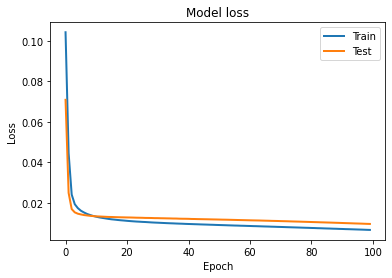

In [ ]:
#plot the loss and validation loss of the model

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

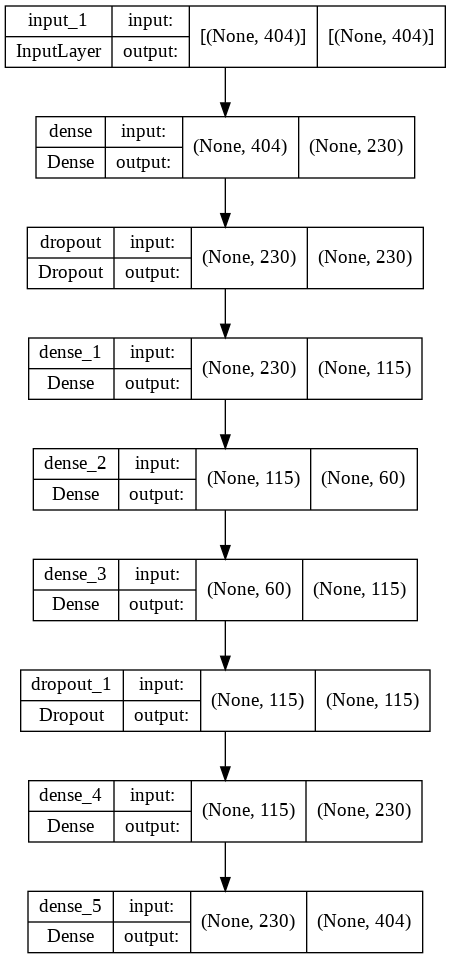

In [ ]:
# plot the autoencoder

plot_model(autoencoder, 'autoencoder.png', show_shapes=True, show_layer_names=True)

## Reconstruction error check

In [ ]:
#Checking the Reconstruction error loss

test_x_predictions=autoencoder.predict(normalized_test_X)
mse=np.mean(np.power(normalized_test_X-test_x_predictions,2),axis=1)

error=pd.DataFrame({'Reconstruction_error':mse,'True_class':y_test_})
error.head()

,Reconstruction_error,True_class
0,0.007596,0.0
1,0.007808,0.0
2,0.009306,0.0
3,0.007237,0.0
4,0.013880,0.0


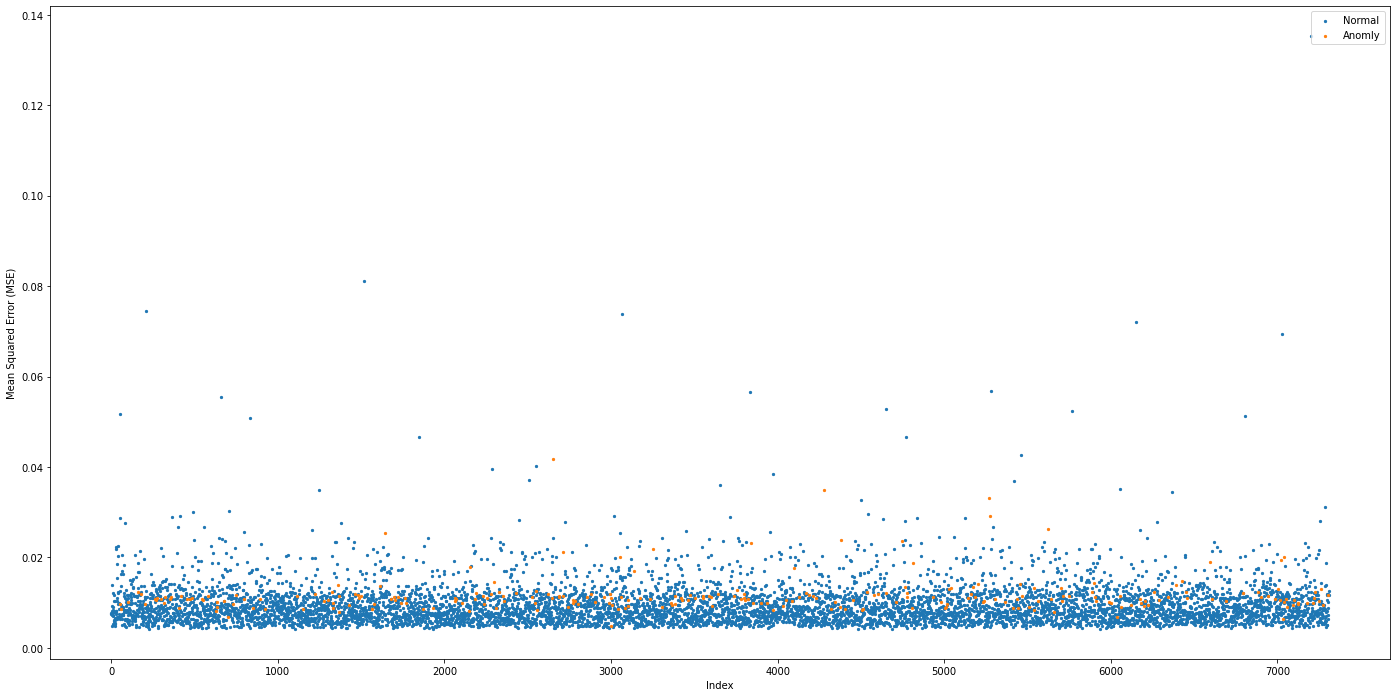

In [ ]:
#plot of the distribution of the anomolies and the normal classes

plt.figure(figsize = (24, 12))
plt.scatter(error.index[error['True_class']==0],error[error['True_class']==0]['Reconstruction_error'],s=5,label='Normal')
plt.scatter(error.index[error['True_class']==1],error[error['True_class']==1]['Reconstruction_error'],s=5,label='Anomly')
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [ ]:
# Finding the f1_score.

precision,recall,threshold=precision_recall_curve(error.True_class,error.Reconstruction_error)
f1_score=2*precision*recall/(precision+recall)
average_precision=average_precision_score(error.True_class,error.Reconstruction_error)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
#choosing the best threshold in order to maximize the F1 score

max_f1=f1_score[f1_score==max(f1_score)]
best_threshold=threshold[f1_score[1: ]==max_f1]
print('best threshold : ',best_threshold)

best threshold :  [0.00980539]


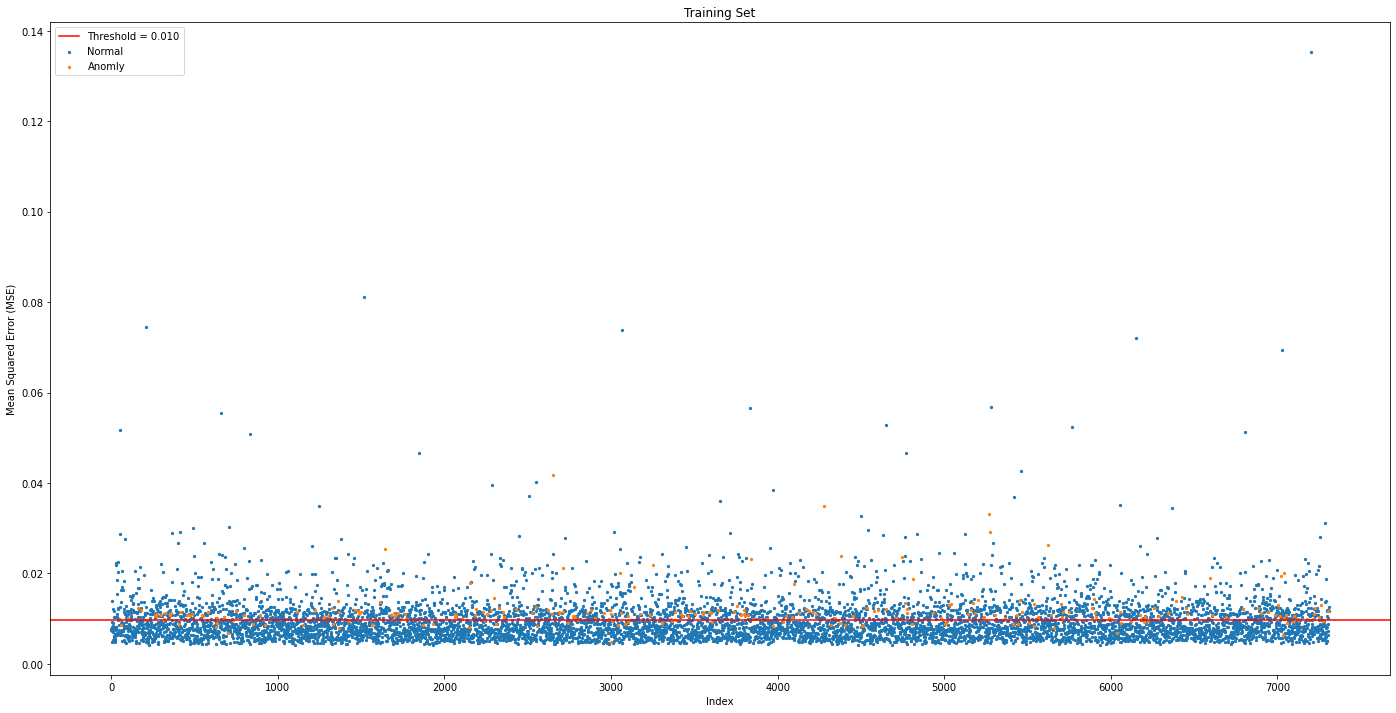

Best threshold = 0.009805


In [ ]:
#Best threshold plots

plt.figure(figsize = (24, 12))
plt.scatter(error.index[error['True_class'] == 0], error[error['True_class'] == 0]['Reconstruction_error'], s = 5, label = 'Normal')
plt.scatter(error.index[error['True_class'] == 1], error[error['True_class'] == 1]['Reconstruction_error'], s = 5, label = 'Anomly')
plt.axhline(best_threshold, color = 'red', label = 'Threshold = %0.3f' % (best_threshold))
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Set')
plt.legend()
plt.show()
print('Best threshold = %f' % (best_threshold))

In [ ]:
#defining the metrics for the model

def metrics(Y,pred):
  print("Accuracy Score :",accuracy_score(Y,pred))
  print('ROC AUC score :',roc_auc_score(Y, pred))
  recall=recall_score(Y,pred)
  print('recall :',recall)
  precision=precision_score(Y,pred)
  print('precision :',precision)
  f1_Score=2*(recall * precision)/(recall+precision)
  print('f1_score :',f1_Score)
  print("Classification Report :")
  print(classification_report(Y,pred))
  print('\n')
  conf_matrix = confusion_matrix(Y, pred)
  plt.figure(figsize=(10, 10))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

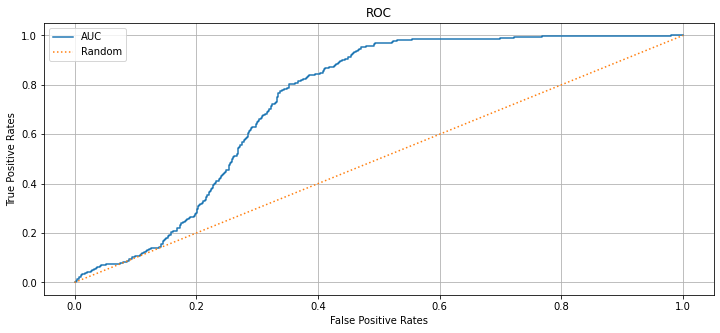

In [ ]:
#defining the ROC curve

fpr, tpr, thres = roc_curve(error.True_class, error.Reconstruction_error)
plt.figure(figsize = (12, 5))
plt.plot(fpr, tpr, label = 'AUC') 
plt.plot([0,1], [0,1], ':', label = 'Random') 
plt.legend() 
plt.grid() 
plt.ylabel("True Positive Rates") 
plt.xlabel("False Positive Rates") 
plt.title('ROC') 
plt.show() 

Accuracy Score : 0.6656634746922024
ROC AUC score : 0.7180116527393205
recall : 0.77431906614786
precision : 0.0769825918762089
f1_score : 0.14004222378606615
Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79      7053
         1.0       0.08      0.77      0.14       257

    accuracy                           0.67      7310
   macro avg       0.53      0.72      0.47      7310
weighted avg       0.96      0.67      0.77      7310





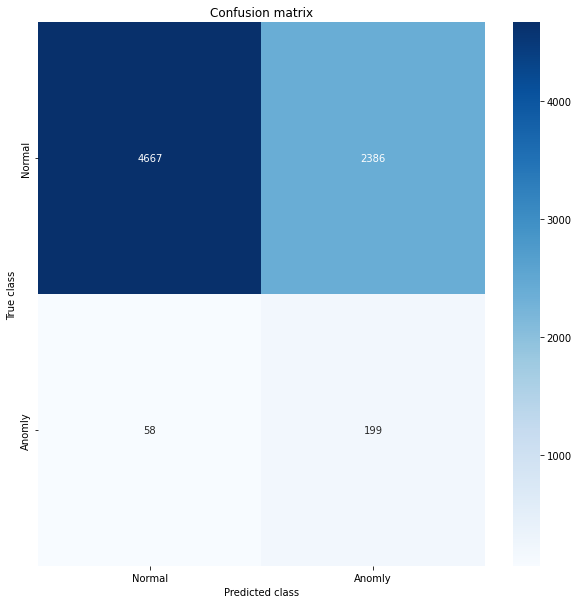

None


In [ ]:
# if reconstruction error is greater than threshold it is Anomly 

pred_y = [1 if e > best_threshold  else 0 for e in error.Reconstruction_error.values]
error['pred'] =pred_y
print(metrics(error.True_class,pred_y))

#Unsupervised Algorithm

In [ ]:
normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(df1),  columns = df1.columns)

In [ ]:
normalized_df

,New_label,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
0,0.0,0.534836,0.0,0.042549,0.000279,0.739130,1.0,0.0,0.0,0.0,...,0.109375,0.008784,0.000000,0.000245,0.234375,0.001894,0.000000,0.0,0.0,0.000000
1,0.0,0.533958,0.0,0.046018,0.000299,0.739130,1.0,0.0,0.0,0.0,...,0.858333,0.008745,0.000000,0.000000,0.808333,0.010354,0.000000,0.0,0.0,0.000000
2,0.0,0.536300,0.0,0.044769,0.000309,0.739130,1.0,0.0,0.0,0.0,...,0.000000,0.011348,0.000000,0.000130,0.000000,0.007418,0.000000,0.0,0.0,0.000000
3,0.0,0.536300,0.0,0.041566,0.000203,0.739130,1.0,0.0,0.0,0.0,...,0.000000,0.009310,0.000000,0.000430,0.000000,0.008888,0.000000,0.0,0.0,0.000000
4,0.0,0.534627,0.0,0.042681,0.000255,0.739130,1.0,0.0,0.0,0.0,...,0.000000,0.015477,0.000000,0.000140,0.000000,0.006046,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36542,0.0,0.524590,1.0,0.009226,0.000370,0.869565,1.0,0.0,0.0,0.0,...,0.208333,0.000763,0.355556,0.000410,0.000000,0.001042,0.000121,0.0,0.0,0.000000
36543,0.0,0.525371,1.0,0.009256,0.000375,0.869565,1.0,0.0,0.0,0.0,...,0.058333,0.000972,0.085714,0.000242,0.000000,0.000000,0.000000,0.0,0.0,0.000166
36544,0.0,0.524590,1.0,0.009489,0.000368,0.869565,1.0,0.0,0.0,0.0,...,0.000000,0.000937,0.057143,0.000839,0.000000,0.000568,0.000000,0.0,0.0,0.000309
36545,0.0,0.538642,1.0,0.009268,0.000368,0.869565,1.0,0.0,0.0,0.0,...,0.000000,0.000625,0.057143,0.000242,0.000000,0.000221,0.000000,0.0,0.0,0.000166


In [ ]:
col=normalized_df.columns.tolist()

col=[co for co in col if co not in ['New_label']]
print(col)
target='New_label'

X=normalized_df[col]
Y=normalized_df[target]

print(type(X))

print(X.shape)
print(Y.shape)

['avg:ambient', 'avg:boottime', 'avg:bytes_in', 'avg:bytes_out', 'avg:cpu_aidle', 'avg:cpu_idle', 'avg:cpu_nice', 'avg:cpu_num', 'avg:cpu_speed', 'avg:cpu_steal', 'avg:cpu_system', 'avg:cpu_user', 'avg:cpu_wio', 'avg:dimm0_temp', 'avg:dimm10_temp', 'avg:dimm11_temp', 'avg:dimm12_temp', 'avg:dimm13_temp', 'avg:dimm14_temp', 'avg:dimm15_temp', 'avg:dimm1_temp', 'avg:dimm2_temp', 'avg:dimm3_temp', 'avg:dimm4_temp', 'avg:dimm5_temp', 'avg:dimm6_temp', 'avg:dimm7_temp', 'avg:dimm8_temp', 'avg:dimm9_temp', 'avg:fan0_0', 'avg:fan0_1', 'avg:fan1_0', 'avg:fan1_1', 'avg:fan2_0', 'avg:fan2_1', 'avg:fan3_0', 'avg:fan3_1', 'avg:fan_disk_power', 'avg:gpu0_core_temp', 'avg:gpu0_mem_temp', 'avg:gpu1_core_temp', 'avg:gpu1_mem_temp', 'avg:gpu3_core_temp', 'avg:gpu3_mem_temp', 'avg:gpu4_core_temp', 'avg:gpu4_mem_temp', 'avg:gv100card0', 'avg:gv100card1', 'avg:gv100card3', 'avg:gv100card4', 'avg:load_fifteen', 'avg:load_five', 'avg:load_one', 'avg:mem_buffers', 'avg:mem_cached', 'avg:mem_free', 'avg:mem_s

##Isolation Forest

In [ ]:
Isolation_Forest=IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=2022,verbose=0)
Isolation_Forest.fit(X)
scores_prediction=Isolation_Forest.decision_function(X)
y_pred2=Isolation_Forest.predict(X)
y_pred2[y_pred2==1]=0 #0 for Normal
y_pred2[y_pred2==-1]=1 #1 Anomly

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation_Forest: 2466
Accuracy Score : 0.9325252414698881
ROC AUC score : 0.5231798398050074
recall : 0.08206686930091185
precision : 0.07906295754026355
f1_score : 0.08053691275167786
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     35231
         1.0       0.08      0.08      0.08      1316

    accuracy                           0.93     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.93      0.93     36547





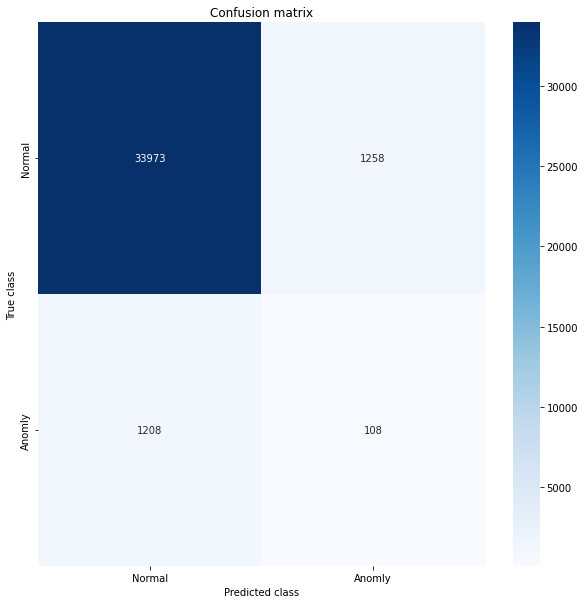

None




In [ ]:
n_errors2=(y_pred2!=Y).sum()
print("{}: {}".format('Isolation_Forest',n_errors2))
print(metrics(Y,y_pred2))
print('\n')

##Local Outlier Factor

In [ ]:
Local_Outlier_Factor=LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction)
Local_Outlier_Factor.fit(X)
score_prediction=Local_Outlier_Factor.negative_outlier_factor_
y_pred3=Local_Outlier_Factor.fit_predict(X)
y_pred3[y_pred3==1]=0 #0 for Normal
y_pred3[y_pred3==-1]=1 #1 Anomly

In [ ]:
# type(y_pred3)
type(normalized_test_y)

numpy.ndarray

Local Outlier Factor: 2480
Accuracy Score : 0.9321421730921827
ROC AUC score : 0.5204209210094833
recall : 0.07674772036474165
precision : 0.0739385065885798
f1_score : 0.07531692766592095
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     35231
         1.0       0.07      0.08      0.08      1316

    accuracy                           0.93     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.93      0.93     36547





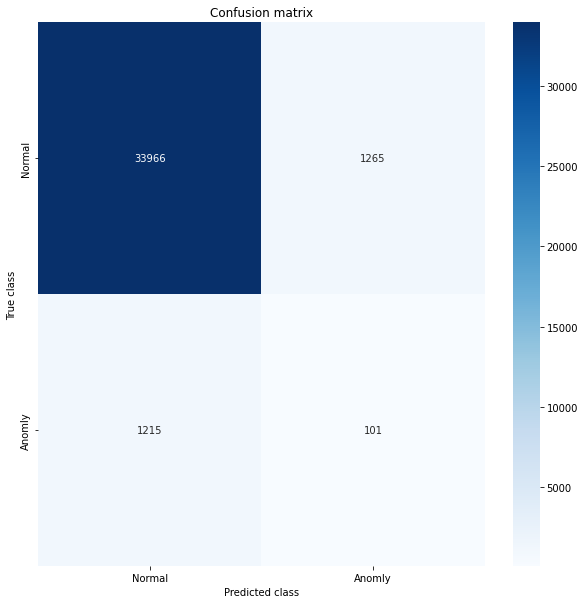

None




In [ ]:
n_errors=(y_pred3!=Y).sum()
print("{}: {}".format('Local Outlier Factor',n_errors))
print(metrics(Y,y_pred3))
print('\n')

##One class SVM

In [ ]:
One_Class_SVM=OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
One_Class_SVM.fit(X)
y_pred4=One_Class_SVM.predict(X)
y_pred4[y_pred4==1]=0 #0 for Normal
y_pred4[y_pred4==-1]=1 #1 Anomly

One Class SVM: 2906
Accuracy Score : 0.9204859495991463
ROC AUC score : 0.520592810852628
recall : 0.08966565349544073
precision : 0.06462212486308871
f1_score : 0.07511139401654997
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     35231
         1.0       0.06      0.09      0.08      1316

    accuracy                           0.92     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.92      0.93     36547





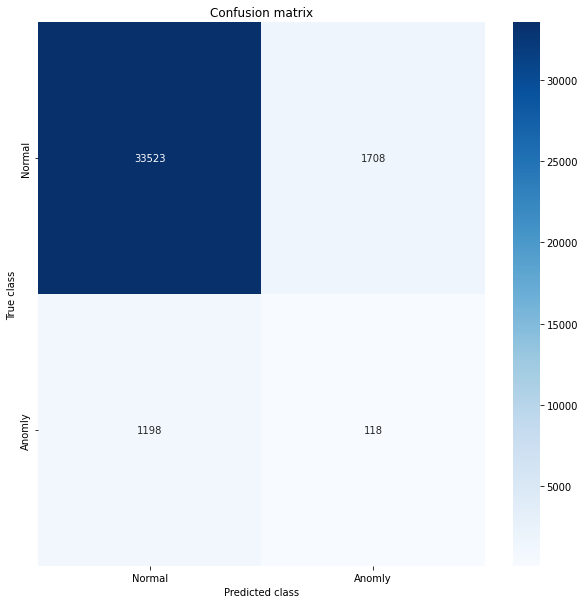

None




In [ ]:
n_errors4=(y_pred4!=Y).sum()
print("{}: {}".format('One Class SVM',n_errors4))
print(metrics(Y,y_pred4))
print('\n')

##Minimum Covariance Determinant

In [ ]:
minimum_covariant_determinant = EllipticEnvelope(contamination=0.01,random_state=2022)
minimum_covariant_determinant.fit(X)
y_pred5=minimum_covariant_determinant.predict(X)
y_pred5[y_pred5==1]=0 #0 for Normal
y_pred5[y_pred5==-1]=1 #1 Anomly

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


One Class SVM: 1660
Accuracy Score : 0.9545790352149287
ROC AUC score : 0.49914115470116077
recall : 0.008358662613981762
precision : 0.030054644808743168
f1_score : 0.013079667063020214
Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     35231
         1.0       0.03      0.01      0.01      1316

    accuracy                           0.95     36547
   macro avg       0.50      0.50      0.49     36547
weighted avg       0.93      0.95      0.94     36547





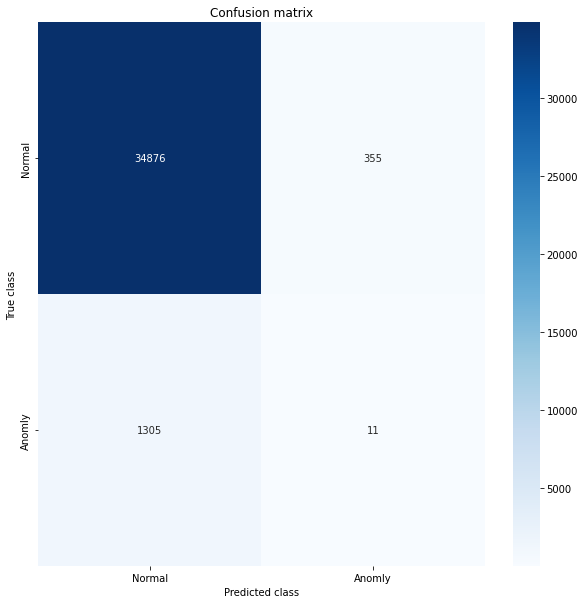

None




In [ ]:
n_errors5=(y_pred5!=Y).sum()
print("{}: {}".format('One Class SVM',n_errors5))
print(metrics(Y,y_pred5))
print('\n')

## Self Supervised Learning with TABNET

**What is self supervision?**

In machine learning, we are talking about self supervision when you train a supervised algorithm with labels which you created artificially. 

It's often a reconstruction game, where you don't have labels but you mask some information from the data itself to the model and then try to predict the information you masked.

Some examples:

* for computer vision, the labels can be "what is the rotation degree applied to this image?" "can you reconstruct the pixels missing on this patch?"

* from video clip: "which one of this to frame comes first in the video?"

* tabular data: "can you reconstruct the missing features?"

**Why self supervision?**

Very often, labelling data is either expensive or very time consuming. Only a small percentage of the available data have labels, and you can only use this small portion of data with supervised algorithms. With the help of self supervision you can use the information of your unlabeled data to pretrain your model. What you are hoping for is that in order to be able to solve the puzzle you created on unlabelled data, your model will need to learn some fundamental concept from your data.

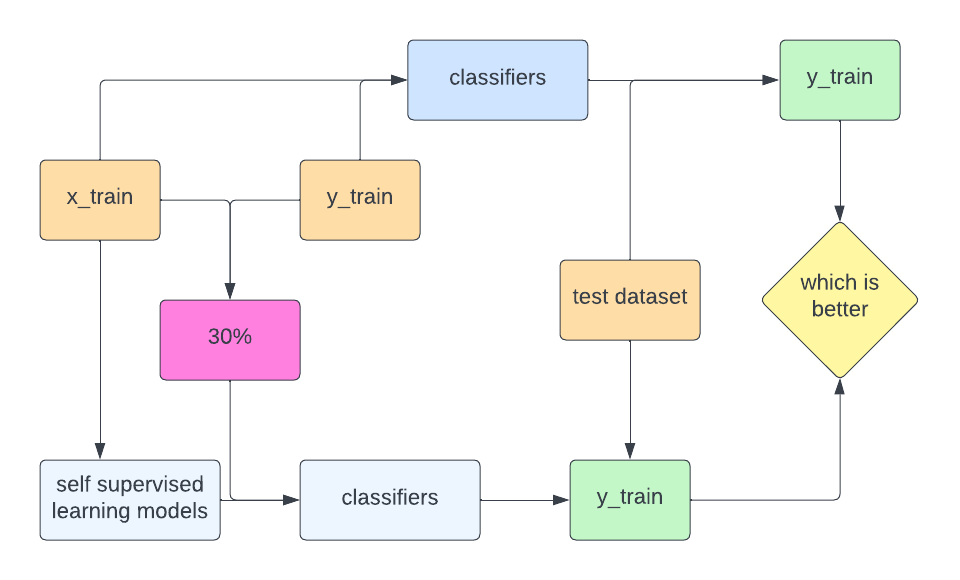

Followed the below approaches for the self supervised model training

1. Let's train a supervised model directly with only 30% data.
2. Let's train the model with all of data without labels
3. let us use the pre-trained model & only 30% data to train the supervised model.

In [ ]:
df2

,New_label,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,...,var:ps0_input_voltag,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power
index,,,,,,,,,,,,,,,,,,,,,
24,0,25.575000,1.588527e+09,40709.020,7824.460,99.8,100.0,0,128,3800,...,0.500000,2.410714,0.000000,12.500000,1.071429,0.571429,0.000000,0.0,0.0,0.000000
27,0,25.560000,1.588527e+09,43783.890,8354.040,99.8,100.0,0,128,3800,...,3.923810,2.400000,0.000000,0.000000,3.695238,3.123810,0.000000,0.0,0.0,0.000000
30,0,25.600000,1.588527e+09,42676.510,8632.320,99.8,100.0,0,128,3800,...,0.000000,3.114286,0.000000,6.666667,0.000000,2.238095,0.000000,0.0,0.0,0.000000
33,0,25.600000,1.588527e+09,39837.270,5743.420,99.8,100.0,0,128,3800,...,0.000000,2.554945,0.000000,21.978022,0.000000,2.681319,0.000000,0.0,0.0,0.000000
36,0,25.571429,1.588527e+09,40825.535,7171.825,99.8,100.0,0,128,3800,...,0.000000,4.247253,0.000000,7.142857,0.000000,1.824176,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,0,25.400000,1.615891e+09,11174.000,10293.460,99.9,100.0,0,128,3800,...,0.952381,0.209524,0.010667,20.952381,0.000000,0.314286,0.004952,0.0,0.0,0.000000
96183,0,25.413333,1.615891e+09,11201.220,10410.890,99.9,100.0,0,128,3800,...,0.266667,0.266667,0.002571,12.380952,0.000000,0.000000,0.000000,0.0,0.0,26.666667
96186,0,25.400000,1.615891e+09,11407.840,10224.000,99.9,100.0,0,128,3800,...,0.000000,0.257143,0.001714,42.857143,0.000000,0.171429,0.000000,0.0,0.0,49.523810


In [ ]:
df2.rename(columns = {'New_label':'target'}, inplace = True)
df2 = df2.reindex(columns = [col for col in df.columns if col != 'target'] + ['target'])
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,avg:ambient,avg:boottime,avg:bytes_in,avg:bytes_out,avg:cpu_aidle,avg:cpu_idle,avg:cpu_nice,avg:cpu_num,avg:cpu_speed,avg:cpu_steal,...,var:ps0_output_curre,var:ps0_output_volta,var:ps1_input_power,var:ps1_input_voltag,var:ps1_output_curre,var:ps1_output_volta,var:swap_free,var:swap_total,var:total_power,target
index,,,,,,,,,,,,,,,,,,,,,
24,25.575000,1.588527e+09,40709.020,7824.460,99.8,100.0,0,128,3800,0,...,2.410714,0.000000,12.500000,1.071429,0.571429,0.000000,0.0,0.0,0.000000,0
27,25.560000,1.588527e+09,43783.890,8354.040,99.8,100.0,0,128,3800,0,...,2.400000,0.000000,0.000000,3.695238,3.123810,0.000000,0.0,0.0,0.000000,0
30,25.600000,1.588527e+09,42676.510,8632.320,99.8,100.0,0,128,3800,0,...,3.114286,0.000000,6.666667,0.000000,2.238095,0.000000,0.0,0.0,0.000000,0
33,25.600000,1.588527e+09,39837.270,5743.420,99.8,100.0,0,128,3800,0,...,2.554945,0.000000,21.978022,0.000000,2.681319,0.000000,0.0,0.0,0.000000,0
36,25.571429,1.588527e+09,40825.535,7171.825,99.8,100.0,0,128,3800,0,...,4.247253,0.000000,7.142857,0.000000,1.824176,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,25.400000,1.615891e+09,11174.000,10293.460,99.9,100.0,0,128,3800,0,...,0.209524,0.010667,20.952381,0.000000,0.314286,0.004952,0.0,0.0,0.000000,0
96183,25.413333,1.615891e+09,11201.220,10410.890,99.9,100.0,0,128,3800,0,...,0.266667,0.002571,12.380952,0.000000,0.000000,0.000000,0.0,0.0,26.666667,0
96186,25.400000,1.615891e+09,11407.840,10224.000,99.9,100.0,0,128,3800,0,...,0.257143,0.001714,42.857143,0.000000,0.171429,0.000000,0.0,0.0,49.523810,0


In [ ]:
x_train = df2.iloc[:20000,:-1].to_numpy()
x_val=df2.iloc[20000:29237,:-1].to_numpy()
y_train=df2.iloc[:20000,-1].to_numpy().squeeze()
y_val = df2.iloc[20000:29237:,-1].to_numpy().squeeze()
x_test  = df2.iloc[29237:,:-1].to_numpy()
y_test=df2.iloc[29237:,-1].to_numpy().squeeze()

In [ ]:
# only a part of data 
part_of_train=df2.sample(frac=0.3)

part_of_x_train=part_of_train.iloc[:10000,:-1].to_numpy()

part_of_x_val=part_of_train.iloc[10000:,:-1].to_numpy()

part_of_y_train=part_of_train.iloc[:10000,-1].to_numpy().squeeze()

part_of_y_val=part_of_train.iloc[10000:,-1].to_numpy().squeeze()

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm_train = SMOTE(random_state=2022)
x_train_res, y_train_res = sm_train.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


print()
sm_val = SMOTE(random_state=2022)
x_val_res, y_val_res = sm_val.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(y_val_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_val_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(y_val_res==2)))
print("After OverSampling, counts of label '0': {}".format(sum(y_val_res==0)))

print()
sm_part = SMOTE(random_state=2022)
part_of_x_train_res, part_of_y_train_res = sm_part.fit_resample(part_of_x_train, part_of_y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(part_of_y_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(part_of_y_train_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(part_of_y_train_res==2)))
print("After OverSampling, counts of label '0': {}".format(sum(part_of_y_train_res==0)))


print()
sm_part_val = SMOTE(random_state=2022)
part_of_x_val_res, part_of_y_val_res = sm_part_val.fit_resample(part_of_x_val, part_of_y_val.ravel())

print('After OverSampling, the shape of train_X: {}'.format(part_of_y_val_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(part_of_y_val_res.shape))

print("After OverSampling, counts of label '2': {}".format(sum(part_of_y_val_res==2)))
print("After OverSampling, counts of label '0': {}".format(sum(part_of_y_val_res==0)))

Before OverSampling, counts of label '2': 929
Before OverSampling, counts of label '0': 19071 

After OverSampling, the shape of train_X: (38142, 404)
After OverSampling, the shape of train_y: (38142,) 

After OverSampling, counts of label '2': 19071
After OverSampling, counts of label '0': 19071

After OverSampling, the shape of train_X: (38142,)
After OverSampling, the shape of train_y: (38142,) 

After OverSampling, counts of label '2': 19071
After OverSampling, counts of label '0': 19071

After OverSampling, the shape of train_X: (19308,)
After OverSampling, the shape of train_y: (19308,) 

After OverSampling, counts of label '2': 9654
After OverSampling, counts of label '0': 9654

After OverSampling, the shape of train_X: (1858,)
After OverSampling, the shape of train_y: (1858,) 

After OverSampling, counts of label '2': 929
After OverSampling, counts of label '0': 929


In [ ]:
class RocAuc(Metric):
    def __init__(self):
        self._name = "roc_auc"
        self._maximize = True

    def __call__(self, y_true, y_score):
        auc = roc_auc_score(y_true, y_score[:, 1])
        return auc

Let us take a look of how we can get if we train a supervised model directly with only 30% data.

In [ ]:
clf_little = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, 
 "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax' 
)

clf_little.fit(
    X_train=part_of_x_train_res, y_train=part_of_y_train_res,
    patience=5,
    max_epochs=500,
    batch_size=256,
    eval_set=[(part_of_x_train_res, part_of_y_train_res), (part_of_x_val_res,part_of_y_val_res)],
    eval_name=['train', 'valid'],
    eval_metric=[RocAuc]
    )

Device used : cpu
epoch 0  | loss: 0.37609 | train_roc_auc: 0.77486 | valid_roc_auc: 0.74507 |  0:00:08s
epoch 1  | loss: 0.16852 | train_roc_auc: 0.5     | valid_roc_auc: 0.5     |  0:00:16s
epoch 2  | loss: 0.11774 | train_roc_auc: 0.60497 | valid_roc_auc: 0.57639 |  0:00:24s
epoch 3  | loss: 0.09546 | train_roc_auc: 0.86963 | valid_roc_auc: 0.93592 |  0:00:32s
epoch 4  | loss: 0.08635 | train_roc_auc: 0.49322 | valid_roc_auc: 0.5181  |  0:00:41s
epoch 5  | loss: 0.07765 | train_roc_auc: 0.92954 | valid_roc_auc: 0.95522 |  0:00:49s
epoch 6  | loss: 0.07208 | train_roc_auc: 0.57532 | valid_roc_auc: 0.62155 |  0:00:57s
epoch 7  | loss: 0.05962 | train_roc_auc: 0.49995 | valid_roc_auc: 0.5     |  0:01:05s
epoch 8  | loss: 0.06193 | train_roc_auc: 0.60309 | valid_roc_auc: 0.62204 |  0:01:17s
epoch 9  | loss: 0.05885 | train_roc_auc: 0.5631  | valid_roc_auc: 0.62042 |  0:01:26s
epoch 10 | loss: 0.0506  | train_roc_auc: 0.82436 | valid_roc_auc: 0.82974 |  0:01:34s

Early stopping occurred 

In [ ]:
predicted_test_partial=clf_little.predict_proba(x_test)[:,1]
score=roc_auc_score(y_test,predicted_test_partial)
score

0.7912541601491446

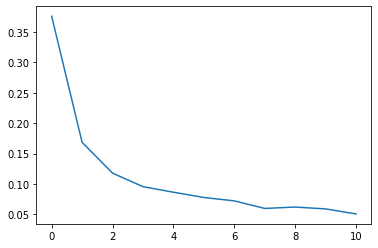

In [ ]:
# plot losses
plt.plot(clf_little.history['loss'])

In [ ]:
y_pred_little = clf_little.predict(x_test)
explain_matrix, masks = clf_little.explain(x_test)

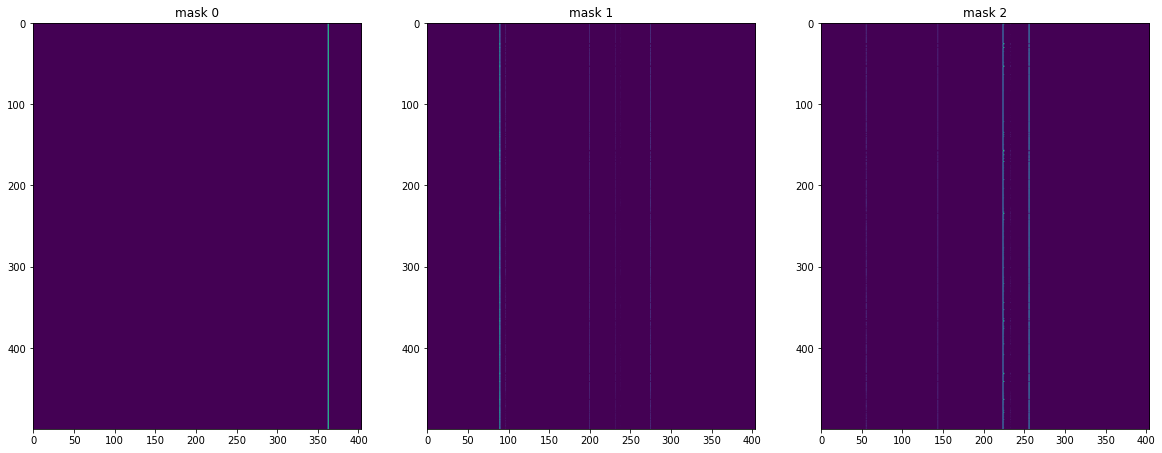

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:500])
    axs[i].set_title(f"mask {i}")

Let's train the model with all of data without labels.

In [ ]:
# TabNet self superviesed trainer 

unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="entmax"
)

unsupervised_model.fit(
    X_train=x_train_res, 
    eval_set=[x_val_res],
    max_epochs=500,
    batch_size=256,
    pretraining_ratio=0.8,
)

Device used : cpu
epoch 0  | loss: 1.3044619001386546e+20| val_0_unsup_loss: 1.3062250914537013e+20|  0:00:20s
epoch 1  | loss: 1.3080202572149105e+20| val_0_unsup_loss: 1.3048207952027058e+20|  0:00:37s
epoch 2  | loss: 1.3077810654323361e+20| val_0_unsup_loss: 1.3062863122611359e+20|  0:00:54s
epoch 3  | loss: 1.3007713681515748e+20| val_0_unsup_loss: 1.3062820901364852e+20|  0:01:11s
epoch 4  | loss: 1.2984967589169947e+20| val_0_unsup_loss: 1.3062831456676479e+20|  0:01:28s
epoch 5  | loss: 1.2914153024165924e+20| val_0_unsup_loss: 1.3062612433960226e+20|  0:01:44s
epoch 6  | loss: 1.2927061068963363e+20| val_0_unsup_loss: 1.3062675765829986e+20|  0:02:01s
epoch 7  | loss: 1.2848337687982424e+20| val_0_unsup_loss: 1.3062541185606746e+20|  0:02:18s
epoch 8  | loss: 1.2821565463952366e+20| val_0_unsup_loss: 1.306245938194164e+20|  0:02:35s
epoch 9  | loss: 1.2774374749039763e+20| val_0_unsup_loss: 1.3062629146536968e+20|  0:02:52s
epoch 10 | loss: 1.2721219552056702e+20| val_0_unsup_

Now let us use the this pre-trained model and only 30% data to train the supervised model.

In [ ]:
# use the pretrained model only on part of the data with labels 

clf_partial = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50,
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax'
)

clf_partial.fit(
    X_train=part_of_x_train_res, y_train=part_of_y_train_res,
    patience=5,
    max_epochs=500,
    batch_size=256,
    eval_set=[(part_of_x_train_res, part_of_y_train_res), (part_of_x_val_res,part_of_y_val_res)],
    eval_name=['train', 'valid'],
    eval_metric=[RocAuc],
    from_unsupervised=unsupervised_model
)

Device used : cpu
Loading weights from unsupervised pretraining
epoch 0  | loss: 15.27922| train_roc_auc: 0.39621 | valid_roc_auc: 0.43974 |  0:00:08s
epoch 1  | loss: 2.00429 | train_roc_auc: 0.44075 | valid_roc_auc: 0.4225  |  0:00:16s
epoch 2  | loss: 1.21773 | train_roc_auc: 0.45935 | valid_roc_auc: 0.44108 |  0:00:24s
epoch 3  | loss: 1.14566 | train_roc_auc: 0.8784  | valid_roc_auc: 0.948   |  0:00:32s
epoch 4  | loss: 1.58524 | train_roc_auc: 0.88001 | valid_roc_auc: 0.95174 |  0:00:41s
epoch 5  | loss: 1.21032 | train_roc_auc: 0.87399 | valid_roc_auc: 0.949   |  0:00:49s
epoch 6  | loss: 1.34421 | train_roc_auc: 0.87661 | valid_roc_auc: 0.95127 |  0:00:57s
epoch 7  | loss: 1.02678 | train_roc_auc: 0.87677 | valid_roc_auc: 0.94833 |  0:01:06s
epoch 8  | loss: 1.6002  | train_roc_auc: 0.88133 | valid_roc_auc: 0.94657 |  0:01:14s
epoch 9  | loss: 1.2278  | train_roc_auc: 0.87787 | valid_roc_auc: 0.95044 |  0:01:22s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_v

In [ ]:
predicted_test_partial=clf_partial.predict_proba(x_test)[:,1]
score=roc_auc_score(y_test,predicted_test_partial)
score

0.8251873753844393

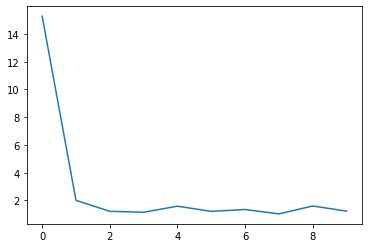

In [ ]:
# plot losses
plt.plot(clf_partial.history['loss'])

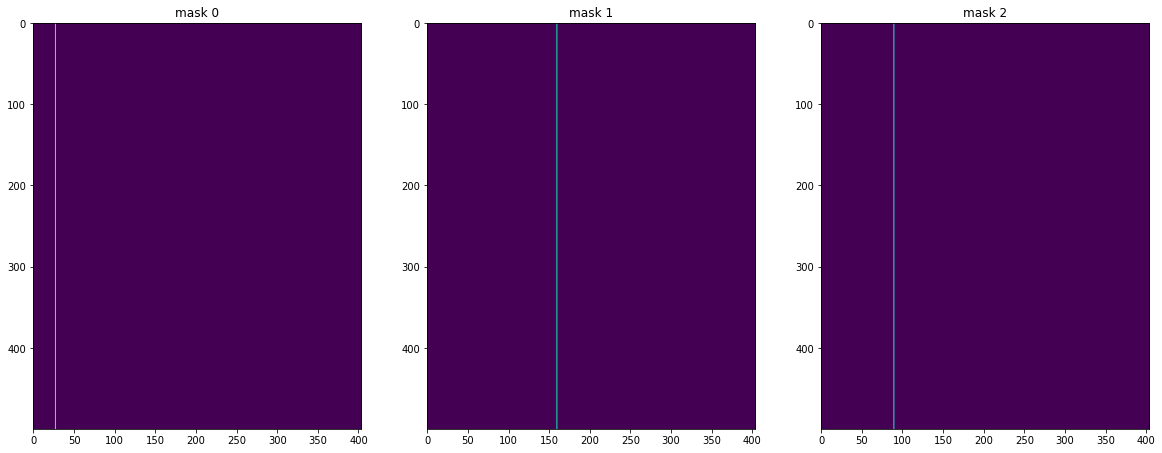

In [ ]:
y_pred_partial = clf_partial.predict(x_test)
explain_matrix, masks = clf_partial.explain(x_test)
# print('masks',masks)


fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:500])
    axs[i].set_title(f"mask {i}")

In [ ]:
# train on the whole dataset with labels

clf_full = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax' # This will be overwritten if using pretrain model
)

clf_full.fit(
    X_train=x_train_res, y_train=y_train_res,
    patience=5,
    max_epochs=500,
    batch_size=256,
    eval_set=[(x_train_res, y_train_res), (x_val_res,y_val_res)],
    eval_name=['train', 'valid'],
    eval_metric=[RocAuc]
    )

Device used : cpu
epoch 0  | loss: 0.21655 | train_roc_auc: 0.71463 | valid_roc_auc: 0.71463 |  0:00:21s
epoch 1  | loss: 0.08912 | train_roc_auc: 0.5     | valid_roc_auc: 0.5     |  0:00:43s
epoch 2  | loss: 0.06782 | train_roc_auc: 0.50836 | valid_roc_auc: 0.50836 |  0:01:11s
epoch 3  | loss: 0.06636 | train_roc_auc: 0.49987 | valid_roc_auc: 0.49987 |  0:01:30s
epoch 4  | loss: 0.05867 | train_roc_auc: 0.38778 | valid_roc_auc: 0.38778 |  0:01:51s
epoch 5  | loss: 0.0517  | train_roc_auc: 0.31214 | valid_roc_auc: 0.31214 |  0:02:13s

Early stopping occurred at epoch 5 with best_epoch = 0 and best_valid_roc_auc = 0.71463
Best weights from best epoch are automatically used!


In [ ]:
predicted_clf_full=clf_full.predict_proba(x_test)[:,1]
score=roc_auc_score(y_test,predicted_clf_full)
score

0.6944396766229575

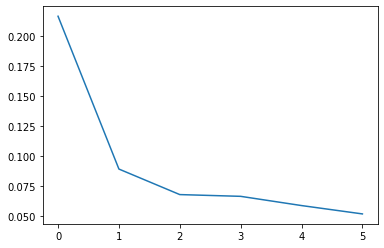

In [ ]:
# plot losses
plt.plot(clf_full.history['loss'])

In [ ]:
y_pred_full = clf_full.predict(x_test)
explain_matrix, masks = clf_full.explain(x_test)

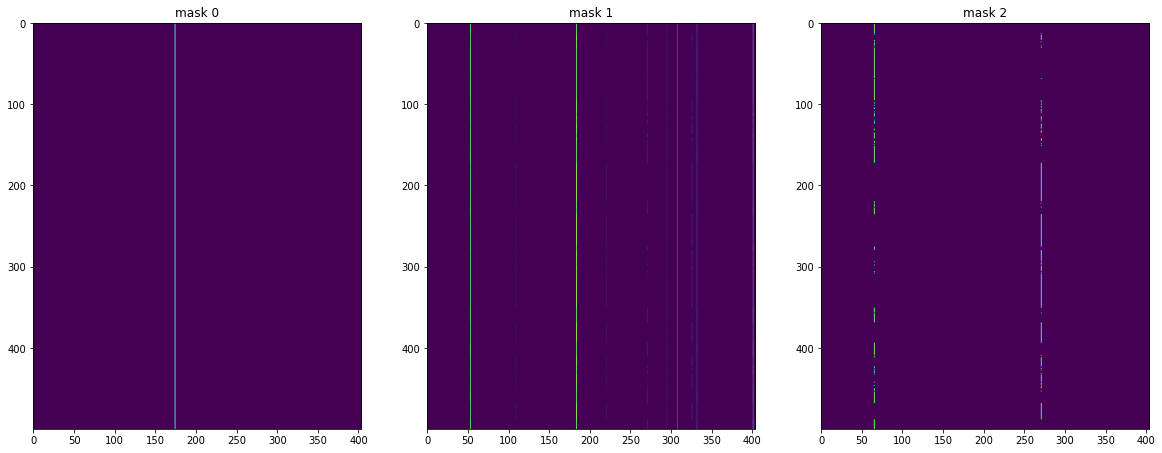

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:500])
    axs[i].set_title(f"mask {i}")

## Model Comparison

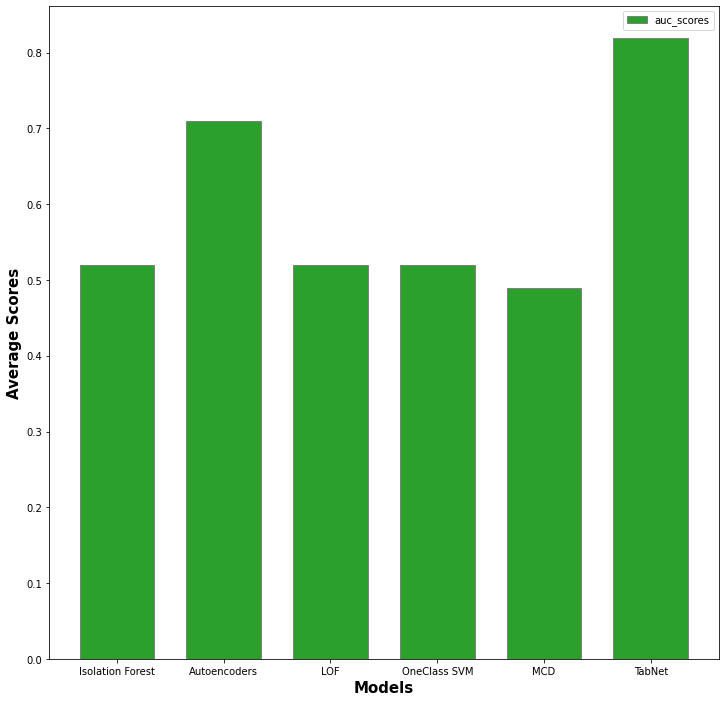

In [ ]:
# set width of bar
barWidth = 0.70
fig = plt.subplots(figsize =(12, 12))
 
# set height of bar
auc_scores=[0.52,0.71,0.52,0.52,0.49,0.82]
 
# Set position of bar on X axis
br1 = np.arange(len(auc_scores))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br2, auc_scores, color ='tab:green', width = barWidth,edgecolor ='grey', label ='auc_scores')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(auc_scores))],['Isolation Forest', 'Autoencoders', 'LOF', 'OneClass SVM','MCD','TabNet'])
 
plt.legend()
plt.show()